# Ejemplo básico de K-Means en Python utilizando `sklearn`

En este notebook se presenta un ejemplo básico de K-Means en Python utilizando la librería `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Como es habitual, empezamos importando las librerías necesarias:

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Creamos el DataFrame pandas con los datos de entrada: 8 muestras (filas) y 2 variables (columnas):

In [2]:
d = {
    'A': [0.93, 0.91, 0.89, 0.87, 0.19, 0.17, 0.23, 0.21], 
    'B': [0.09, 0.07, 0.13, 0.11, 0.83, 0.81, 0.79, 0.77]
}

df = pd.DataFrame(data=d)

df

,A,B
0,0.93,0.09
1,0.91,0.07
2,0.89,0.13
3,0.87,0.11
4,0.19,0.83
5,0.17,0.81
6,0.23,0.79
7,0.21,0.77


Representamos gráficamente la matriz para observar la naturaleza de los datos:

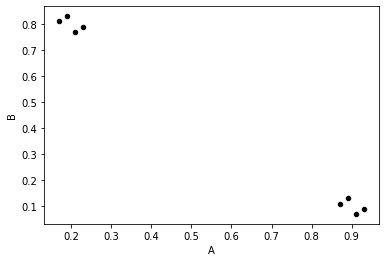

In [3]:
df.plot.scatter(x = 'A', y = 'B', c = 'black')
plt.show()

En este caso parece que hay dos grupos bien diferenciados, así que vamos a utilizar la función `KMeans` para agrupar las muestras en 2 clusters:

In [4]:
kmeans = KMeans(n_clusters=2).fit(df)

kmeans

KMeans(n_clusters=2)

Obtenemos las coordenadas de los dos centroides:

In [5]:
centroids = kmeans.cluster_centers_

print('Centroide del primer cluster:', str(centroids[0,:]))
print('Centroide del segundo cluster:', str(centroids[1,:]))

Centroide del primer cluster: [0.2 0.8]
Centroide del segundo cluster: [0.9 0.1]


Y creamos nuevamente el gráfico anterior añadiendo estos dos puntos:

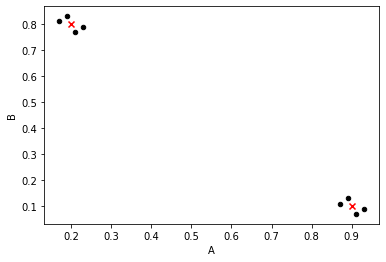

In [6]:
df.plot.scatter(x = 'A', y = 'B', c = 'black')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', marker = 'x')
plt.show()

Obtenemos las asignaciones de las muestras a los clusters y las añadimos a nuestro dataset:

In [7]:
labels = kmeans.predict(df)

df.labeled = pd.concat([df, pd.DataFrame({'group': labels})], axis = 1)

df.labeled

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,A,B,group
0,0.93,0.09,1
1,0.91,0.07,1
2,0.89,0.13,1
3,0.87,0.11,1
4,0.19,0.83,0
5,0.17,0.81,0
6,0.23,0.79,0
7,0.21,0.77,0


Y utilizamos las etiquetas para dar un color a los puntos:

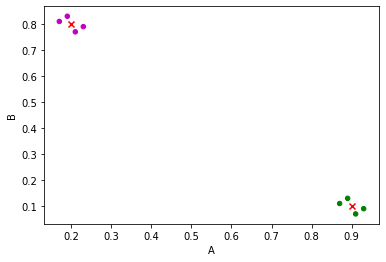

In [8]:
colors = np.where(df.labeled['group']==0,'m','g')

df.plot.scatter(x = 'A', y = 'B', c = colors)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', marker = 'x')
plt.show()

Podemos comprobar cómo la media de los puntos asignados a cada cluster se corresponde con el centroide:

In [9]:
centroid0 = df.labeled[df.labeled['group'] == 0].sum(axis = 0) / 4
centroid1 = df.labeled[df.labeled['group'] == 1].sum(axis = 0) / 4

print('Centroide del primer cluster:\n', centroid0)
print('\nCentroide del segundo cluster:\n', centroid1)

Centroide del primer cluster:
 A        0.2
B        0.8
group    0.0
dtype: float64

Centroide del segundo cluster:
 A        0.9
B        0.1
group    1.0
dtype: float64


Aplicamos el método *elbow* a este ejemplo, utilizando de 1 a 3 clusters:

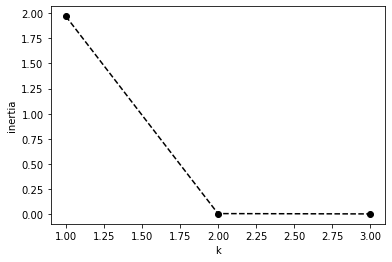

In [16]:
k_range = range(1, 4)

kmeans = [KMeans(n_clusters=i) for i in k_range]
inertia = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]

plt.xlabel('k')
plt.ylabel('inertia')
plt.plot(k_range, inertia, linestyle='--', marker='o', color='black')
plt.show()

Finalmente, haremos el análisis de silhouette para este caso. Para ello, sklearn incluye dos funciones: `silhouette_samples`, que devuelve los scores de todas las muestras dadas (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html), y `silhouette_score`, que devuelve el score medio sobre todas las muestras (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). En la documentación de sklearn se puede encontrar un ejemplo de este tipo de análisis: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Dado que esta métrica requiere de al menos dos grupos (clusters), vamos a calcular los silhouette scores solo para k = 2 y k = 3:

In [11]:
from sklearn import metrics

labels_k = [kmeans[i].predict(df) for i in range(1, 3)]
silhouettes = [metrics.silhouette_score(df, labels_k[i-1], metric = 'euclidean') for i in range(1, 3)]

print('silhouette para k = 2:', silhouettes[0])
print('silhouette para k = 3:', silhouettes[1])

silhouette para k = 2: 0.9501021758103687
silhouette para k = 3: 0.7382483773636076


In [12]:
df.silhouette = pd.concat([
    df, 
    pd.DataFrame({'group (k = 2)': labels_k[0]}),
    pd.DataFrame({'silhouette (k = 2)': metrics.silhouette_samples(df, labels_k[0], metric = 'euclidean')}),
    pd.DataFrame({'group (k = 3)': labels_k[1]}),
    pd.DataFrame({'silhouette (k = 3)': metrics.silhouette_samples(df, labels_k[1], metric = 'euclidean')}),
], axis = 1)

df.silhouette

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


,A,B,group (k = 2),silhouette (k = 2),group (k = 3),silhouette (k = 3)
0,0.93,0.09,0,0.951527,2,0.527864
1,0.91,0.07,0,0.951527,2,0.527864
2,0.89,0.13,0,0.948677,1,0.527864
3,0.87,0.11,0,0.948677,1,0.527864
4,0.19,0.83,1,0.951527,0,0.950143
5,0.17,0.81,1,0.951527,0,0.950143
6,0.23,0.79,1,0.948677,0,0.947123
7,0.21,0.77,1,0.948677,0,0.947123


## Escalado de variables

Tal y como comentamos en clase de teoría, en ciertos casos puede ser necesario aplicar un escalado de variables para conseguir mejores resultados y evitar que ciertas variables dominen el método empleado. Comenzamos por añadir una nueva variable C al ejemplo anterior y aplicar el algoritmo K-Means con k = 2. Tal y como se puede ver, esta variable toma valores de 0.56 o 0.55 independientemente del "grupo" al que pertenece según el K-Means anterior, y el resultado de este nuevo K-Means incluyendo dicha variable es el mismo.

In [13]:
d_1 = {
    'A': [0.93, 0.91, 0.89, 0.87, 0.19, 0.17, 0.23, 0.21], 
    'B': [0.09, 0.07, 0.13, 0.11, 0.83, 0.81, 0.79, 0.77],
    'C': [0.55, 0.56, 0.55, 0.56, 0.55, 0.56, 0.55, 0.56]
}

df_1 = pd.DataFrame(data=d_1)

kmeans_1 = KMeans(n_clusters=2).fit(df_1)

df_1.labeled = pd.concat([df_1, pd.DataFrame({'group': kmeans_1.predict(df_1)})], axis = 1)

df_1.labeled

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


,A,B,C,group
0,0.93,0.09,0.55,0
1,0.91,0.07,0.56,0
2,0.89,0.13,0.55,0
3,0.87,0.11,0.56,0
4,0.19,0.83,0.55,1
5,0.17,0.81,0.56,1
6,0.23,0.79,0.55,1
7,0.21,0.77,0.56,1


Ahora, creamos un DataFrame similar pero con la variable C en una escala superior, es decir, con los valores 550 y 560 distribuidos de igual modo entre las 8 muestras. En este caso, se puede observar como estos valores tan altos dominan las distancias y se obtiene un agrupamiento diferente.

In [14]:
d_2 = {
    'A': [0.93, 0.91, 0.89, 0.87, 0.19, 0.17, 0.23, 0.21], 
    'B': [0.09, 0.07, 0.13, 0.11, 0.83, 0.81, 0.79, 0.77],
    'C': [550, 560, 550, 560, 550, 560, 550, 560]
}

df_2 = pd.DataFrame(data=d_2)

kmeans_2 = KMeans(n_clusters=2).fit(df_2)

df_2.labeled = pd.concat([df_2, pd.DataFrame({'group': kmeans_2.predict(df_2)})], axis = 1)

df_2.labeled

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


,A,B,C,group
0,0.93,0.09,550,1
1,0.91,0.07,560,0
2,0.89,0.13,550,1
3,0.87,0.11,560,0
4,0.19,0.83,550,1
5,0.17,0.81,560,0
6,0.23,0.79,550,1
7,0.21,0.77,560,0


Para evitar que ciertas variables dominen el cálculo de los grupos, es habitual aplicar un escalado de variables que las sitúe en escalas comparables. La técnica más habitual es la estandarización, que consiste en escalar cada variable restando a cada valor la media y dividiéndolo por la desviación típica. De esta manera, cada variable tendrá media = 0 y desviación típica = 1. Aplicamos el escalado utilizando el `StandardScaler` de sklearn y comprobamos el resultado del agrupamiento, que vuelve a dejar de estar influenciado por la variable C.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_2_scaled = pd.DataFrame(scaler.fit_transform(df_2))

print(df_2_scaled)

print(scaler.mean_)

kmeans_2 = KMeans(n_clusters=2).fit(df_2_scaled)

df_2.labeled = pd.concat([df_2_scaled, pd.DataFrame({'group': kmeans_2.predict(df_2_scaled)})], axis = 1)

df_2.labeled

          0         1    2
0  1.083505 -1.026479 -1.0
1  1.026479 -1.083505  1.0
2  0.969452 -0.912426 -1.0
3  0.912426 -0.969452  1.0
4 -1.026479  1.083505 -1.0
5 -1.083505  1.026479  1.0
6 -0.912426  0.969452 -1.0
7 -0.969452  0.912426  1.0
[5.50e-01 4.50e-01 5.55e+02]


,0,1,2,group
0,1.083505,-1.026479,-1.0,1
1,1.026479,-1.083505,1.0,1
2,0.969452,-0.912426,-1.0,1
3,0.912426,-0.969452,1.0,1
4,-1.026479,1.083505,-1.0,0
5,-1.083505,1.026479,1.0,0
6,-0.912426,0.969452,-1.0,0
7,-0.969452,0.912426,1.0,0
